<a href="https://colab.research.google.com/github/sohansputhran/cats-and-dogs-classifier/blob/master/Dogs_%26_Cats_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sohansp","key":"b7a529cd08706a4da0c0832626efcb7d"}'}

In [4]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge            COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-05-27 21:50:10          71785  
roche-data-science-coalition/uncover                         UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          10483  
stefanlarson/outofscope-intent-classification-dataset        Out-of-Scope Intent Classification Dataset          285KB  2020-05-15 03:04:34              1  
rmjacobsen/property-listings-for-5-south-american-countries  Property Listings for 5 South American Countries    475MB  2020-05-25 02:05:38              1  
siddharthm1698/coursera-course-dataset                    

In [5]:
! kaggle datasets download 'chetankv/dogs-cats-images'

 98% 425M/435M [00:19<00:00, 44.8MB/s]
100% 435M/435M [00:19<00:00, 23.1MB/s]


In [6]:
!mkdir dogs-cats-images
! unzip dogs-cats-images.zip -d dogs-cats-images

Streaming output truncated to the last 5000 lines.
  inflating: dogs-cats-images/dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dogs-cats-images/dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dogs-cats-images/dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dogs-cats-images/dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dogs-cats-images/dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dogs-cats-images/dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dogs-cats-images/dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dogs-cats-images/dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dogs-cats-images/dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dogs-cats-images/dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dogs-cats-images/dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dogs-cats-images/dog vs cat/dataset

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [0]:
data_dir = "/content/dogs-cats-images/dataset"
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

train_data = datasets.ImageFolder(data_dir + '/training_set', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test_set', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [11]:
model = models.densenet121(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

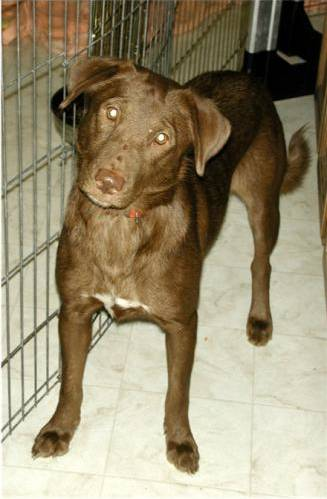

In [12]:
from google.colab.patches import cv2_imshow
import cv2 

img = cv2.imread("/content/dogs-cats-images/dataset/training_set/dogs/dog.1.jpg")
cv2_imshow(img)

In [0]:
import time
import numpy as np

In [15]:
for device in ['cpu', 'cuda']:

    criterion = nn.NLLLoss()
    # Only train the classifier parameters, feature parameters are frozen
    optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

    model.to(device)

    for ii, (inputs, labels) in enumerate(trainloader):

        # Move input and label tensors to the GPU
        inputs, labels = inputs.to(device), labels.to(device)

        start = time.time()

        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if ii==3:
            break
        
    print(f"Device = {device}; Time per batch: {(time.time() - start)/3:.3f} seconds")

Device = cpu; Time per batch: 4.491 seconds
Device = cuda; Time per batch: 0.009 seconds


In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.densenet121(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(1024, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device);

In [24]:
# initialize tracker for minimum validation loss
test_loss_min = np.Inf # set initial "min" to infinity

epochs = 1
steps = 0
print_every = 5
for epoch in range(epochs):
    for inputs, labels in trainloader:
        train_loss = 0
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            test_loss = test_loss/len(testloader)        
            print(f"Epoch {epoch+1}/{steps}.. "
                  f"Train loss: {train_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss:.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            model.train()
            # save model if test loss has decreased
            if test_loss <= test_loss_min:
                print('Test loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                  test_loss_min,
                  test_loss))
                torch.save(model.state_dict(), 'model.pt')
                test_loss_min = test_loss

Epoch 1/5.. Train loss: 0.025.. Test loss: 0.042.. Test accuracy: 0.988
Test loss decreased (inf --> 0.041761).  Saving model ...
Epoch 1/10.. Train loss: 0.020.. Test loss: 0.036.. Test accuracy: 0.990
Test loss decreased (0.041761 --> 0.036358).  Saving model ...
Epoch 1/15.. Train loss: 0.018.. Test loss: 0.052.. Test accuracy: 0.981
Epoch 1/20.. Train loss: 0.034.. Test loss: 0.034.. Test accuracy: 0.990
Test loss decreased (0.036358 --> 0.034081).  Saving model ...
Epoch 1/25.. Train loss: 0.062.. Test loss: 0.056.. Test accuracy: 0.981
Epoch 1/30.. Train loss: 0.045.. Test loss: 0.095.. Test accuracy: 0.965
Epoch 1/35.. Train loss: 0.039.. Test loss: 0.044.. Test accuracy: 0.985
Epoch 1/40.. Train loss: 0.040.. Test loss: 0.042.. Test accuracy: 0.986
Epoch 1/45.. Train loss: 0.022.. Test loss: 0.059.. Test accuracy: 0.980
Epoch 1/50.. Train loss: 0.017.. Test loss: 0.042.. Test accuracy: 0.990
Epoch 1/55.. Train loss: 0.035.. Test loss: 0.052.. Test accuracy: 0.984
Epoch 1/60.. T

In [25]:
model.load_state_dict(torch.load('/content/model.pt'))

<All keys matched successfully>

In [0]:
from PIL import Image
from torchvision.transforms import ToTensor
from torch.autograd import Variable


def image_loader(image_name):
    """load image, returns cuda tensor"""
    loader = transforms.Compose([
                                transforms.ToTensor()])
    image = Image.open(image_name)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    return image.cuda()  #assumes that you're using GPU
  
def classifier(image):
  data = torch.exp(model(image))
  data = data.cpu().data.numpy()[0]
  if data[0] < data[1]: print('CAT')
  else: print("DOG") 

In [90]:
image = image_loader("/content/dogs-cats-images/dataset/training_set/dogs/dog.2.jpg")
classifier(image)
# cla = torch.exp(model(image))
# cla

DOG


tensor([0, 0], device='cuda:0')

In [93]:
image = image_loader("/content/dogs-cats-images/dataset/test_set/cats/cat.4001.jpg")
classifier(image)

CAT
